# Fashion MNIST Classification 

## Step 1:Load and Explore the Fashion MNIST Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist

# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [10]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print the first 10 labels with class names
print("First 10 training labels with corresponding class names:")
for i in range(10):
    print(f"Label {train_labels[i]}: {class_names[train_labels[i]]}")

First 10 training labels with corresponding class names:
Label 9: Ankle boot
Label 0: T-shirt/top
Label 0: T-shirt/top
Label 3: Dress
Label 0: T-shirt/top
Label 2: Pullover
Label 7: Sneaker
Label 2: Pullover
Label 5: Sandal
Label 5: Sandal


Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)
Training labels shape: (60000,)
Test labels shape: (10000,)


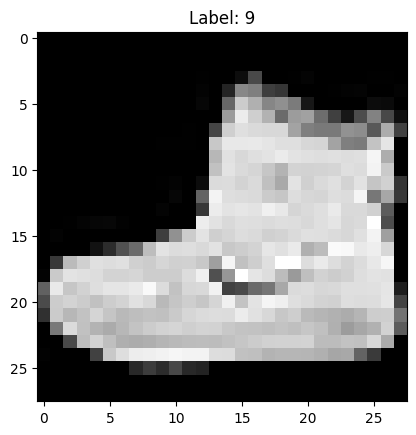

In [11]:
# Exploring the dataset
# Display basic information
print("Training set shape:", train_images.shape)
print("Test set shape:", test_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

# Display the first image and label
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


# Step 2 : EDA - Visualizations

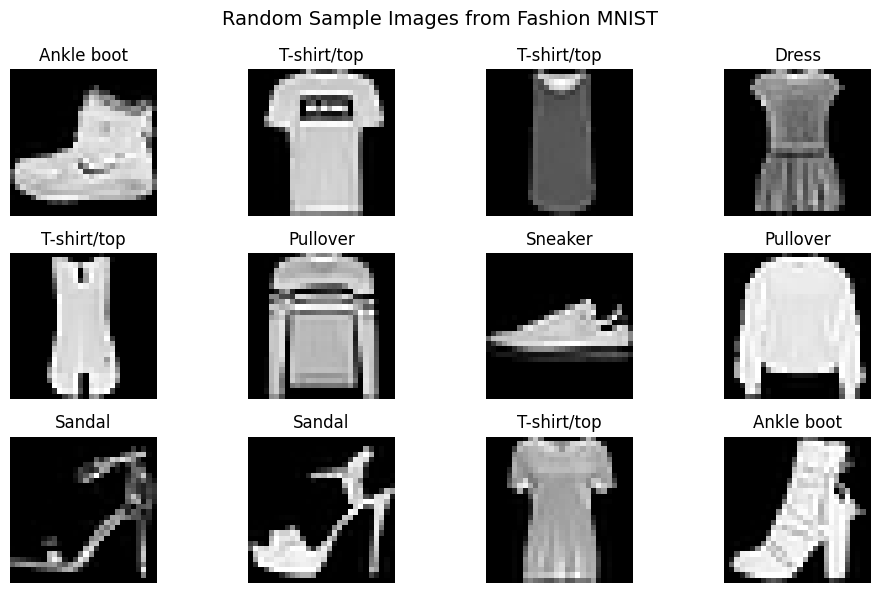

In [12]:

# Display random sample images from the dataset
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.suptitle("Random Sample Images from Fashion MNIST", fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
# Scale the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print("Training set shape after reshaping:", train_images.shape)
print("Test set shape after reshaping:", test_images.shape)


Training set shape after reshaping: (60000, 28, 28, 1)
Test set shape after reshaping: (10000, 28, 28, 1)


C:\Users\bikas\AppData\Local\Temp\ipykernel_7904\1362643370.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_labels_df, palette="viridis")


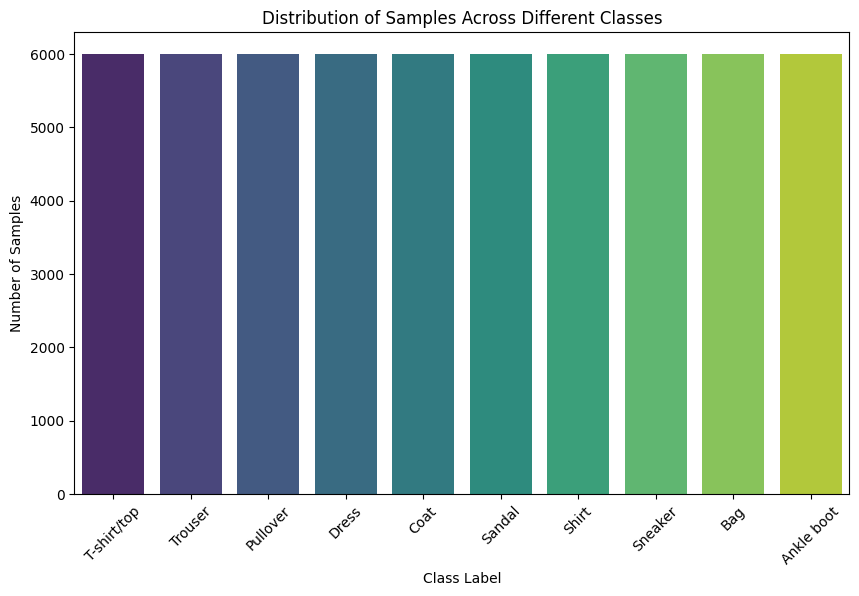

In [8]:
# Bar Chart for Class Distribution
import pandas as pd

# Convert labels to a DataFrame for easier plotting
train_labels_df = pd.DataFrame(train_labels, columns=['label'])

# Plotting the distribution of samples across different classes
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_labels_df, palette="viridis")
plt.title("Distribution of Samples Across Different Classes")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.show()


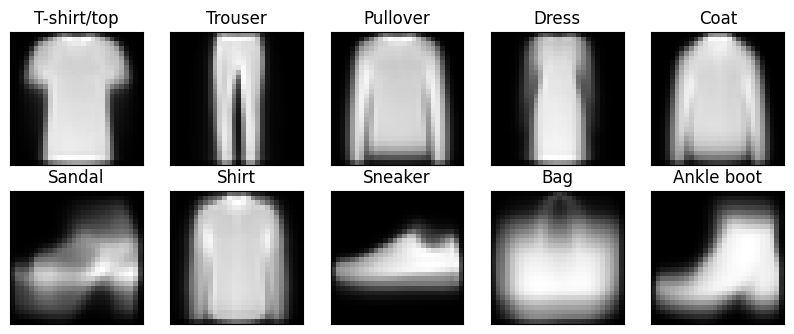

In [14]:
# Calculate the mean image for each class
mean_images = np.zeros((10, 28, 28))
for i in range(10):
    class_images = train_images[train_labels == i]
    mean_images[i] = class_images.mean(axis=0).reshape(28, 28)

# Display the mean images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mean_images[i], cmap='gray')
    plt.title(class_names[i])
plt.show()


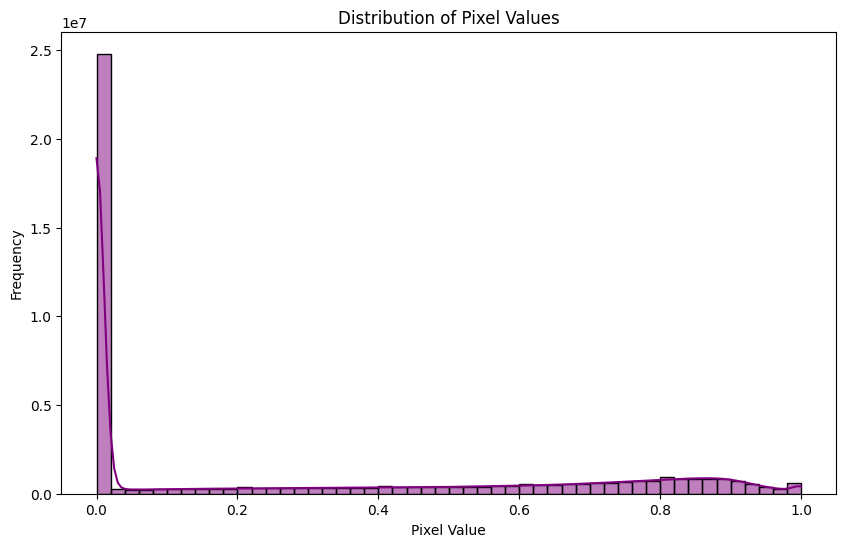

In [9]:
# Flatten the images to create a single array of pixel values
flattened_images = train_images.flatten()

# Plot the distribution of pixel values
plt.figure(figsize=(10, 6))
sns.histplot(flattened_images, bins=50, color='purple', kde=True)
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


# Step 3: Data Preprocessing

In [16]:
# Check for class imbalance
# Count the occurrences of each class label in the training set
class_counts = np.bincount(train_labels)

# Display the count of samples for each class
for i, count in enumerate(class_counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")


Class 0 (T-shirt/top): 6000 samples
Class 1 (Trouser): 6000 samples
Class 2 (Pullover): 6000 samples
Class 3 (Dress): 6000 samples
Class 4 (Coat): 6000 samples
Class 5 (Sandal): 6000 samples
Class 6 (Shirt): 6000 samples
Class 7 (Sneaker): 6000 samples
Class 8 (Bag): 6000 samples
Class 9 (Ankle boot): 6000 samples


In [17]:
# Scale the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print("Training set shape after reshaping:", train_images.shape)
print("Test set shape after reshaping:", test_images.shape)


Training set shape after reshaping: (60000, 28, 28, 1)
Test set shape after reshaping: (10000, 28, 28, 1)


# 4. Building an Artificial Neural Network

## Model 1: simple feedforward neural network

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Compile the Model

In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 6. Training the Model

In [23]:
# Train the model
history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    validation_split=0.2, 
                    batch_size=128)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8187 - loss: 0.5144 - val_accuracy: 0.8173 - val_loss: 0.5064
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8235 - loss: 0.4988 - val_accuracy: 0.8242 - val_loss: 0.4957
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8307 - loss: 0.4820 - val_accuracy: 0.8267 - val_loss: 0.4871
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8321 - loss: 0.4803 - val_accuracy: 0.8292 - val_loss: 0.4791
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.4707 - val_accuracy: 0.8291 - val_loss: 0.4737
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8392 - loss: 0.4618 - val_accuracy: 0.8323 - val_loss: 0.4669
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8390 - loss: 0.4585 - val_accuracy: 0.8338 - val_loss: 0.4616
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.4598 - val_accuracy: 0.

# 7. Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8364 - loss: 0.4648
Test accuracy: 0.8294


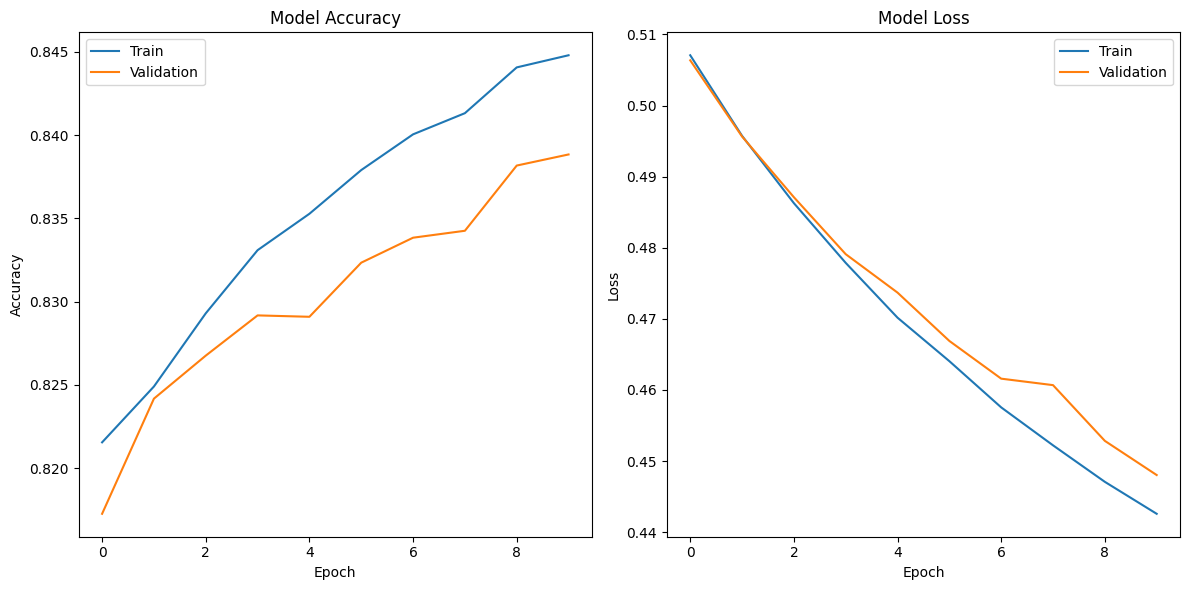

In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [25]:
# Save the entire model to a HDF5 file
model.save('fashion_mnist_ann_model.h5')
print("Model saved successfully.")


Model saved successfully.


## Model 2: CNN Model



In [27]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training and Evaluation

In [28]:
# Train the CNN model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# Evaluate the CNN model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy after CNN training: {accuracy:.4f}")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3614 - loss: 1.7734 - val_accuracy: 0.6929 - val_loss: 0.7889
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7086 - loss: 0.7744 - val_accuracy: 0.7095 - val_loss: 0.7136
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7350 - loss: 0.7006 - val_accuracy: 0.7483 - val_loss: 0.6611
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7507 - loss: 0.6682 - val_accuracy: 0.7704 - val_loss: 0.6228
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7681 - loss: 0.6225 - val_accuracy: 0.7781 - val_loss: 0.5932
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7825 - loss: 0.5801 - val_accuracy: 0.7883 - val_loss: 0.5681
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7937 - loss: 0.5579 - val_accuracy: 0.7982 - val_loss: 0.5444
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7991 - loss: 0.5344 - val_a

In [30]:
# Save the model
model.save('fashion_mnist_cnn_model.h5')

# 8. Test Set Prediction

In [31]:
from keras.models import load_model
# Load the previously saved model
loaded_model = load_model('fashion_mnist_cnn_model.h5')

In [35]:
# Use the loaded model to predict classes for the test set
predictions = loaded_model.predict(test_images)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Display Sample Predictions and Images

In [42]:
# Function to display sample predictions

def display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples//2, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [43]:
# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


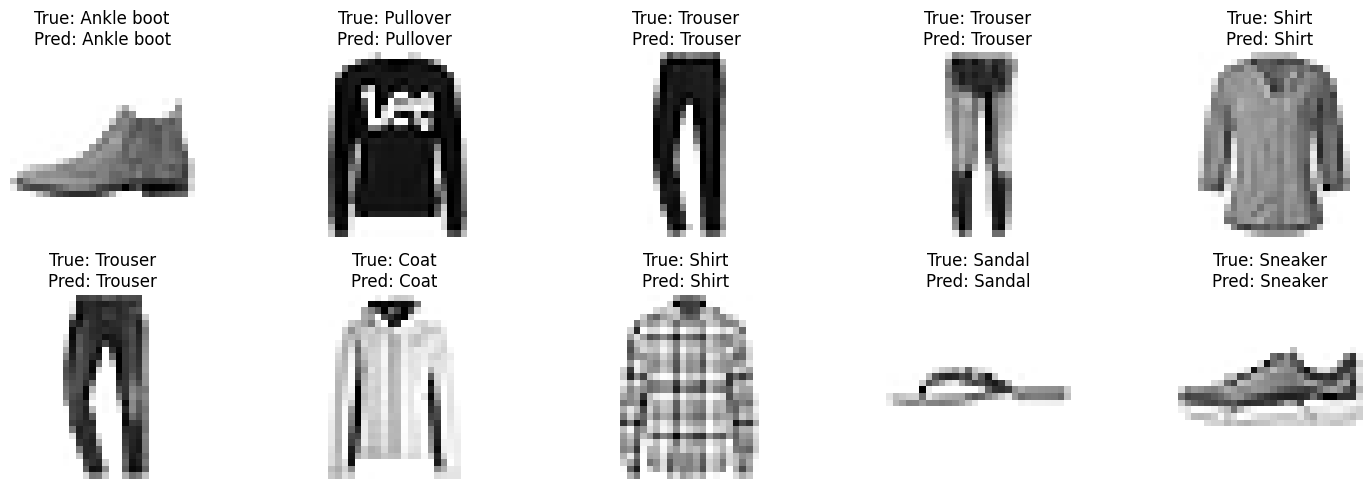

In [44]:
# Display sample predictions
display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


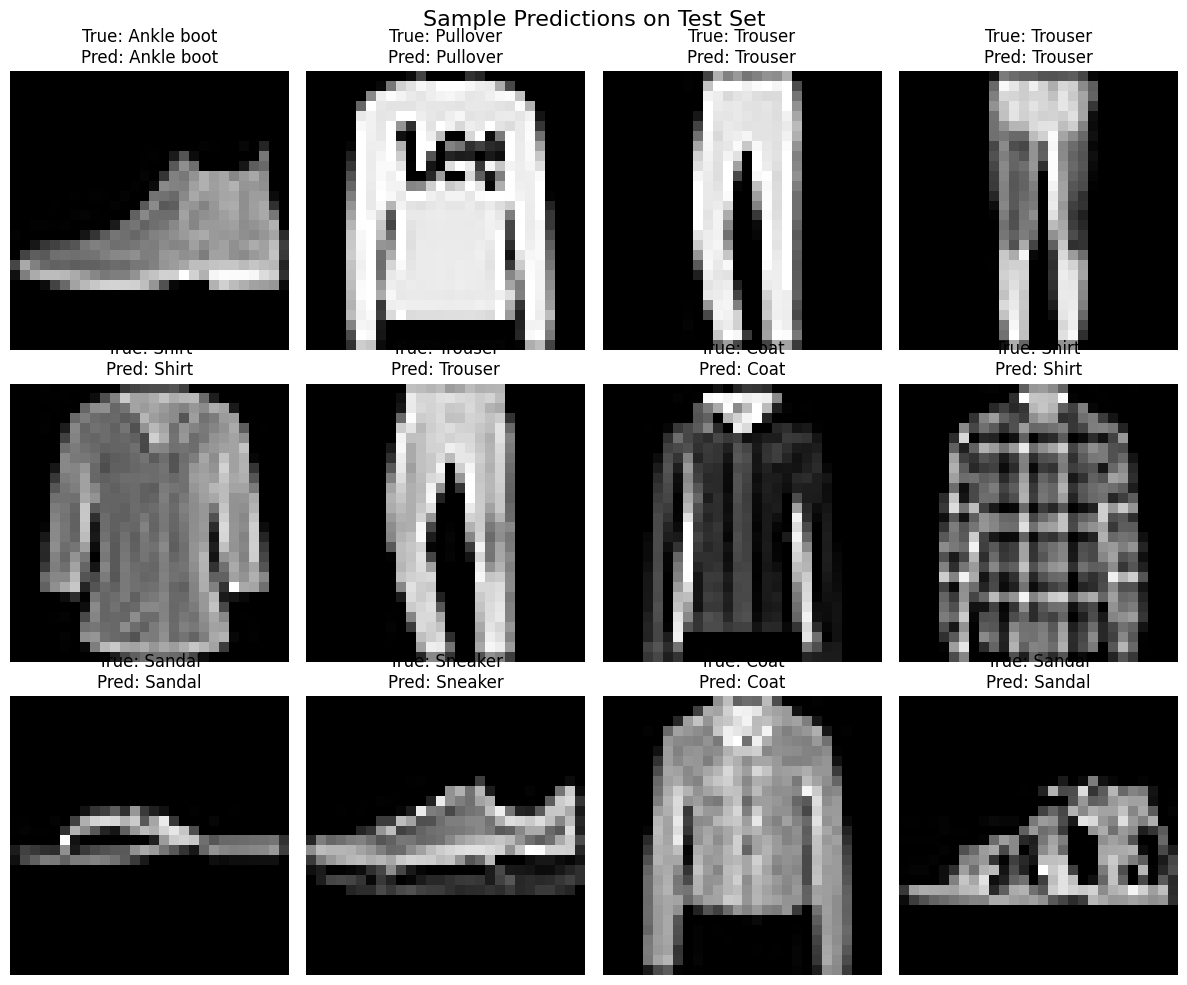

In [40]:
# Predict classes for the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Get the index of the highest probability for each prediction

# Display a few sample predictions along with their true labels
plt.figure(figsize=(12, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.suptitle("Sample Predictions on Test Set", fontsize=16)
plt.tight_layout()
plt.show()


## Hyperparameter Tuning for Simple Feedforward Neural Network

Trial 5 Complete [00h 00m 49s]
val_accuracy: 0.870638887087504

Best val_accuracy So Far: 0.870638887087504
Total elapsed time: 00h 03m 33s

The optimal number of units in the first Dense layer is 256.
The optimal dropout rate is 0.0.
The optimal learning rate for the optimizer is 0.01.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5986 - loss: 1.1589 - val_accuracy: 0.7955 - val_loss: 0.5524
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8165 - loss: 0.5088 - val_accuracy: 0.8323 - val_loss: 0.4655
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8409 - loss: 0.4431 - val_accuracy: 0.8487 - val_loss: 0.4245
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.4090 - val_accuracy: 0.8537 - val_loss: 0.4094
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8623 - loss: 0.3825 - val_accuracy: 0.8431 - val_loss: 0.4265
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8656 

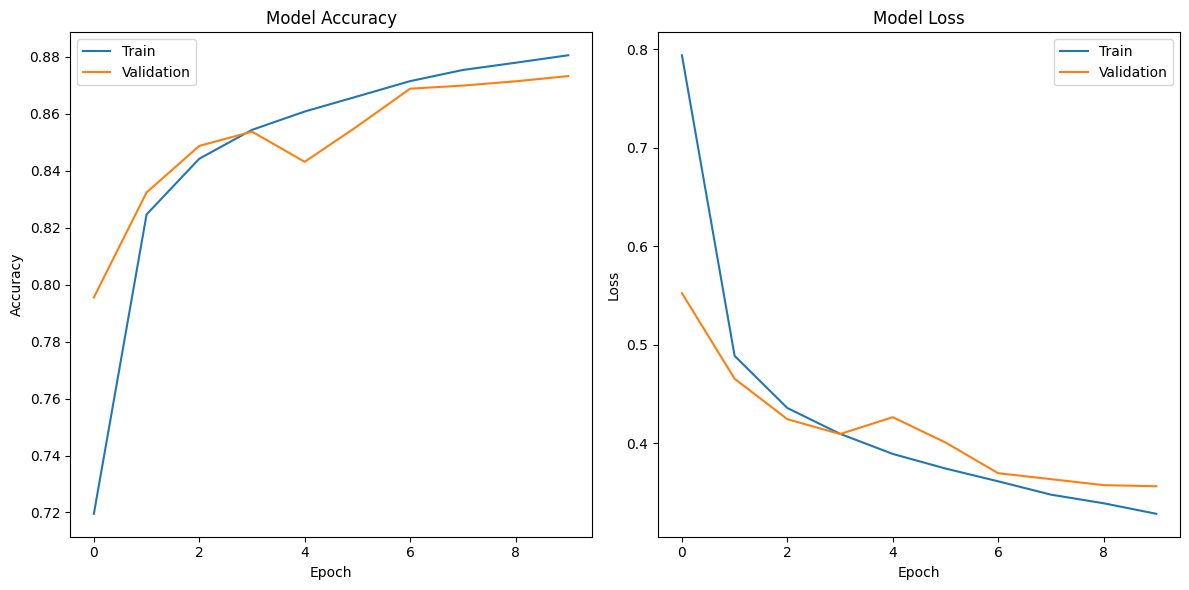

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from kerastuner import RandomSearch
import matplotlib.pyplot as plt
import tensorflow as tf


# Define a function to build the model with tunable hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    
    # Tune the number of neurons in the first Dense layer
    hp_units = hp.Int('units', min_value=64, max_value=256, step=64)
    model.add(Dense(units=hp_units, activation='relu'))
    
    # Tune dropout rate
    hp_dropout = hp.Choice('dropout', values=[0.0, 0.2, 0.3, 0.5])
    model.add(tf.keras.layers.Dropout(hp_dropout))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

# Set up the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of models to try
    executions_per_trial=3,  # Average results over 3 runs
    directory='mnist_tuning',
    project_name='fashion_mnist'
)

# Run the hyperparameter search
tuner.search(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first Dense layer is {best_hps.get('units')}.
The optimal dropout rate is {best_hps.get('dropout')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


Before hyperparameter tuning, the model achieved a training accuracy of 84.40% and a validation accuracy of 83.88%, with a training loss of 0.4438 and a validation loss of 0.4480. While the training and validation metrics were close, indicating decent generalization, the overall performance was limited by suboptimal hyperparameters. After tuning, the validation accuracy improved significantly to 87.06%, with the optimal configuration using 256 neurons in the Dense layer, a dropout rate of 0.0, and a learning rate of 0.01. The increase in validation accuracy highlights better generalization and learning capacity, achieved by optimizing the network size and learning rate while confirming that dropout was unnecessary for this dataset. Hyperparameter tuning provided a systematic approach to refine the model, resulting in a notable improvement in performance.

## Hyperparameter Tuning for CNN

Trial 30 Complete [00h 00m 55s]
val_accuracy: 0.7287499904632568

Best val_accuracy So Far: 0.8265833258628845
Total elapsed time: 00h 20m 47s

The optimal number of filters in the first Conv2D layer is 32 with kernel size 5.
The optimal pool size for the first MaxPooling layer is 2.
The optimal number of filters in the second Conv2D layer is 64 with kernel size 5.
The optimal pool size for the second MaxPooling layer is 2.
The optimal number of units in the Dense layer is 128.
The optimal dropout rate is 0.4.
The optimal learning rate for the optimizer is 0.001.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.3379 - loss: 1.7676 - val_accuracy: 0.6983 - val_loss: 0.8250
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6697 - loss: 0.8830 - val_accuracy: 0.7220 - val_loss: 0.7320
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7042 - loss: 0.7792 - val_accuracy: 0.7392 - val_loss: 0.6693
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━

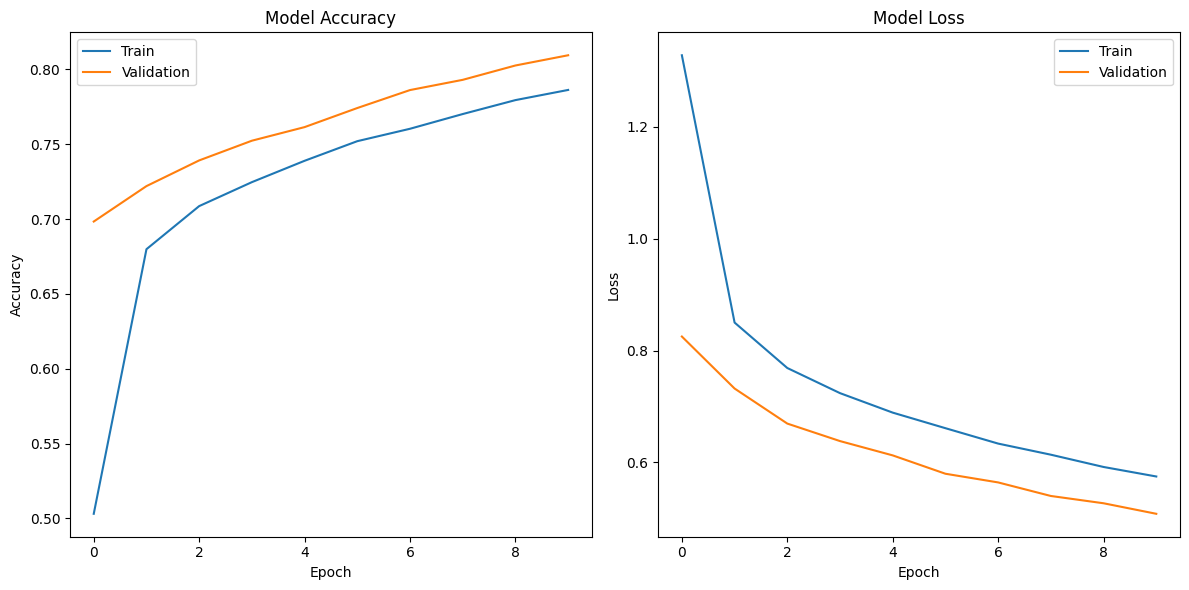

In [50]:
from kerastuner import Hyperband

# Define a function to build the CNN model with tunable hyperparameters
def build_model(hp):
    model = Sequential()
    
    # First Conv2D layer with tunable filters
    model.add(Conv2D(filters=hp.Choice('conv1_filters', [16, 32, 64]), 
                     kernel_size=hp.Choice('conv1_kernel', [3, 5]), 
                     activation='relu', 
                     input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool1_size', [2, 3])))

    # Second Conv2D layer with tunable filters
    model.add(Conv2D(filters=hp.Choice('conv2_filters', [32, 64, 128]), 
                     kernel_size=hp.Choice('conv2_kernel', [3, 5]), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool2_size', [2, 3])))

    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(units=hp.Choice('dense_units', [64, 128, 256]), activation='relu'))

    # Dropout for regularization
    model.add(Dropout(rate=hp.Choice('dropout_rate', [0.0, 0.2, 0.4, 0.5])))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Set up the Keras Tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='cnn_tuning',
    project_name='fashion_mnist_cnn'
)

# Run the search
tuner.search(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of filters in the first Conv2D layer is {best_hps.get('conv1_filters')} with kernel size {best_hps.get('conv1_kernel')}.
The optimal pool size for the first MaxPooling layer is {best_hps.get('pool1_size')}.
The optimal number of filters in the second Conv2D layer is {best_hps.get('conv2_filters')} with kernel size {best_hps.get('conv2_kernel')}.
The optimal pool size for the second MaxPooling layer is {best_hps.get('pool2_size')}.
The optimal number of units in the Dense layer is {best_hps.get('dense_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build and train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy after tuning: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# 8. Test Set Prediction - After Hyperparameter Tuning (Using Feedforward Neural Network)

In [55]:
# Save the tuned model
model.save('tuned_fashion_mnist_model.h5')
print("Model saved as 'tuned_fashion_mnist_model.h5'")


Model saved as 'tuned_fashion_mnist_model.h5'


In [56]:
# Load the previously saved model
loaded_model = load_model('tuned_fashion_mnist_model.h5')
print("Model loaded successfully!")

Model loaded successfully!


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


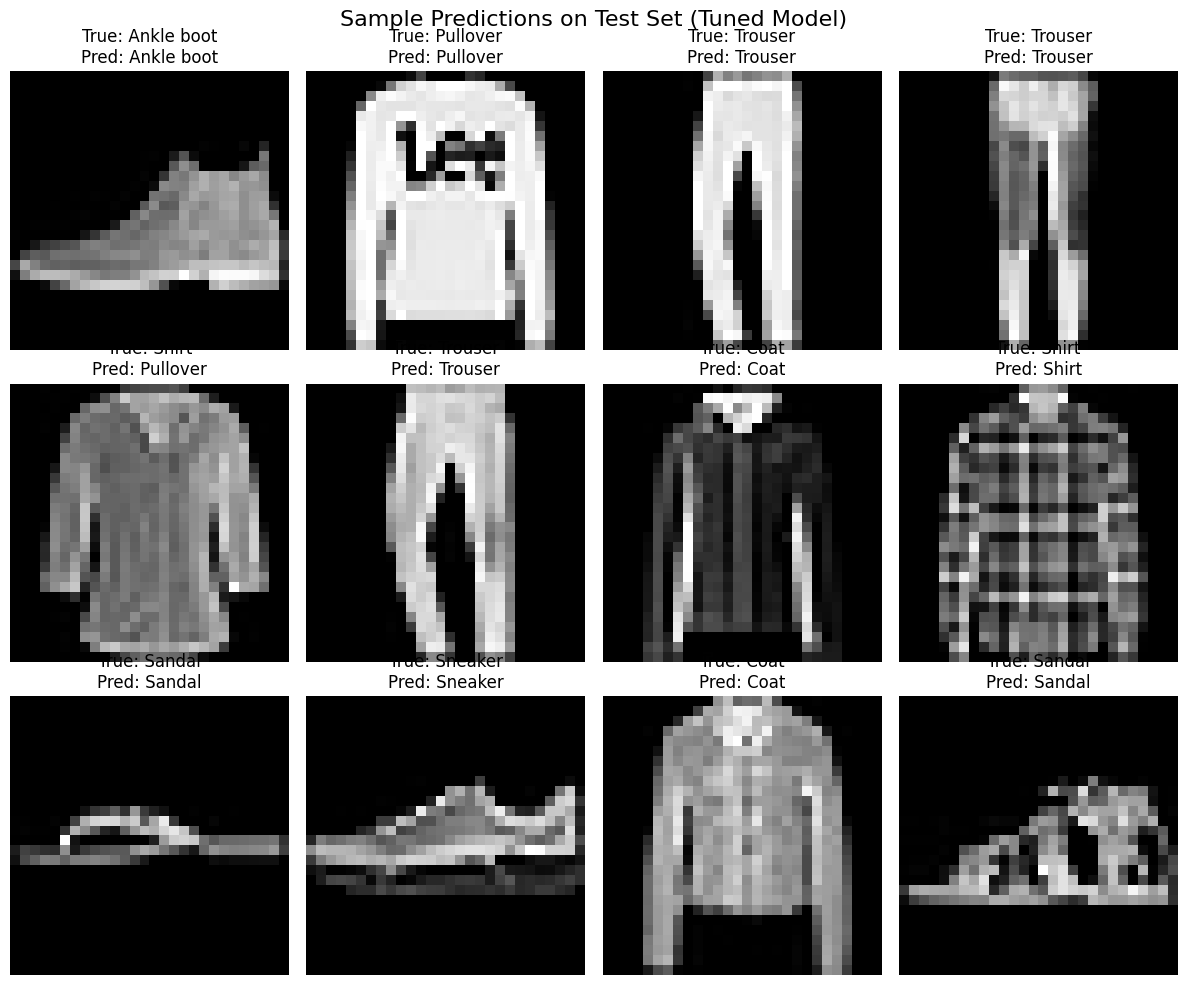

In [59]:
# Predict classes for the test set
predictions = loaded_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Get the index of the highest probability for each prediction

# Define the class names (for Fashion MNIST)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display a few sample predictions along with their true labels
plt.figure(figsize=(12, 10))
for i in range(12):  # Display the first 12 test samples
    plt.subplot(3, 4, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape if needed for visualization
    plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')

plt.suptitle("Sample Predictions on Test Set (Tuned Model)", fontsize=16)
plt.tight_layout()
plt.show()


## Recommended Model

## Conclusion